In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras import Model

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Loading MNIST Handwritten digits dataset

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Showcasing what dataset holds and its image form

array of image in data..
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

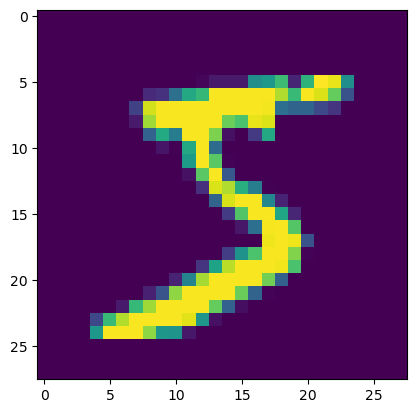

In [14]:
plt.imshow(x_train[0])
print(f'array of image in data..\n{x_train[0]}')

## Normalizing Image

In [15]:
x_train = x_train/255
x_test = x_test/255

In [47]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### shapes of datasets

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

## Model Builder Function

In [40]:

def build_func_model() :
    input_layer = layers.Input(shape=(28,28))
    flatten_layer = layers.Flatten()(input_layer)
    dense1 = layers.Dense(128, activation='relu')(flatten_layer)
    dense2 = layers.Dense(64,activation='relu')(dense1)
    output_layer = layers.Dense(10, activation='softmax')(dense2)

    func_model = Model(inputs = input_layer , outputs = output_layer)
    return func_model

### manual parameter calculation

In [48]:
28*28 # flatten image data

784

In [49]:
784*128+128 # (input * no. of neuron)+ no. of neurons
# ie. - no. of wights + no. of biases...


100480

In [45]:
128*64+64

8256

In [46]:
64*10+10

650

In [50]:
100480 + 8256 + 650

109386

## Built model & Summary

In [41]:
model = build_func_model()

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation

In [52]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### sparse_categorical_crossentropy
is a loss function, not a distance metric and not an evaluation metric like accuracy or F1.

It measures how wrong the predicted probability distribution is, by looking only at the probability assigned to the true class, and penalizing low confidence logarithmically.

its used for multi-class-classification, where our y labelled data is interger form like labelencoding like [0,1,6,4,7,...]

categorical_crossentropy is also  for multi-class-classification but one-hot encoded y labels, like we have 10 classes[0,0,1,0,0,0,0,0,0,0]

Apply cross-entropy formula
#### Loss = -log(p_true)

#### eg-
predicted will be like - ŷ = [0.01, 0.02, 0.03, 0.90, 0.01, 0.01, 0.01, 0.00, 0.00, 0.01]

p_true = ŷ[3] = 0.90

Loss = -log(0.90) ≈ 0.105

In [54]:
784/5

156.8

In [55]:
156*128+128+128*64+64+64*10+10

29002

In [53]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9282 - loss: 0.2439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0711
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9830 - loss: 0.0547
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0435


In [61]:
# 1875 we get here are no. of steps performed in each epoch ie. meaning total sample/ batch_size - default we used 32
# our full batch = 60000
60000/32 

1875.0

## plotting loss and accuracy change in each epoch

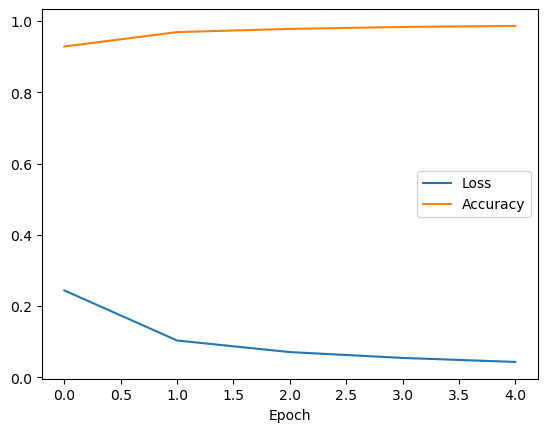

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()


## Model Evaluation

In [64]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9739 - loss: 0.0877


0.9739000201225281

In [67]:
print(f'Loss on the test data - Sparse CrossEntropy : {loss}\n')
print(f'Accuracy on the test data : {acc}')

Loss on the test data - Sparse CrossEntropy : 0.08767683804035187

Accuracy on the test data : 0.9739000201225281
